In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Malware dataset (1).csv")

In [ ]:
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
df.shape

(100000, 35)

In [ ]:
df.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [ ]:
df=df.dropna(how="any",axis=0)
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
df['classification'] = df.classification.map({'benign':0, 'malware':1})

In [ ]:
y = df['classification']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [ ]:
x=df.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [ ]:
x = df.loc[:,['state']].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(x)
train_scaled

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [9.46700748e-05],
       [9.46700748e-05],
       [9.46700748e-05]])

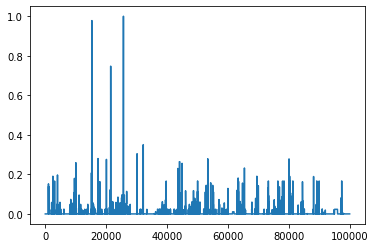

In [ ]:
plt.plot(train_scaled)

In [ ]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model=GradientBoostingClassifier()

In [ ]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
model.score(x_test,prediction)

1.0

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predict = rf.predict(x_test)

In [ ]:
predict

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
rf.score(x_test,y_test)

0.61325

## **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
NN = MLPClassifier((9,), max_iter=5500,activation='relu')
NN.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(9,), max_iter=5500)

In [ ]:
predict = NN.predict(x_test)

In [ ]:
NN.score(x_test,predict)

1.0

# **RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))


regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train)

1.0

# **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.score(x_test,y_test)

0.61325